In [1]:
import cv2 as cv
import matplotlib.pyplot as plt

In [2]:
net =cv.dnn.readNetFromTensorflow("graph_opt.pb")

In [3]:
inWidth = 500
inHeight =500
thr=0.01

In [4]:
BODY_PARTS = { "Nose": 0, "Neck": 1, "RShoulder": 2, "RElbow": 3, "RWrist": 4,
               "LShoulder": 5, "LElbow": 6, "LWrist": 7, "RHip": 8, "RKnee": 9,
               "RAnkle": 10, "LHip": 11, "LKnee": 12, "LAnkle": 13, "REye": 14,
               "LEye": 15, "REar": 16, "LEar": 17, "Background": 18 }

POSE_PAIRS = [ ["Neck", "RShoulder"], ["Neck", "LShoulder"], ["RShoulder", "RElbow"],
               ["RElbow", "RWrist"], ["LShoulder", "LElbow"], ["LElbow", "LWrist"],
               ["Neck", "RHip"], ["RHip", "RKnee"], ["RKnee", "RAnkle"], ["Neck", "LHip"],
               ["LHip", "LKnee"], ["LKnee", "LAnkle"], ["Neck", "Nose"], ["Nose", "REye"],
               ["REye", "REar"], ["Nose", "LEye"], ["LEye", "LEar"] ]

In [8]:
img=cv.imread("manpose.jpg")

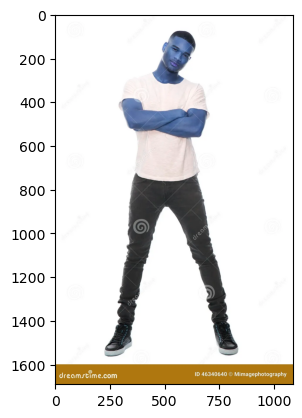

In [3]:
plt.imshow(img)

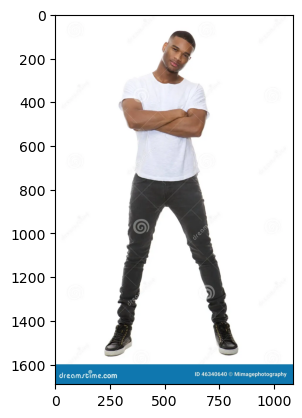

In [7]:
plt.imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB))

In [8]:
def pose_estimation(frame):
    frameWidth = frame.shape[1]
    frameHeight = frame.shape[0]
    net.setInput(cv.dnn.blobFromImage(frame, 1.0, (inWidth, inHeight), (127.5, 127.5, 127.5), swapRB=True, crop=False))
    out = net.forward()
    out = out[:, :19, :, :]
    
    assert(len(BODY_PARTS) == out.shape[1])
    
    points = []
    
    for i in range(len(BODY_PARTS)):
        # Slice heatmap of corresponding body's part.
        heatMap = out[0, i, :, :]

        # Originally, we try to find all the local maximums. To simplify a sample
        # we just find a global one. However only a single pose at the same time
        # could be detected this way.
        _, conf, _, point = cv.minMaxLoc(heatMap)
        x = (frameWidth * point[0]) / out.shape[3]
        y = (frameHeight * point[1]) / out.shape[2]

        # Add a point if it's confidence is higher than threshold.
        points.append((int(x), int(y)) if conf > thr else None)

    for pair in POSE_PAIRS:
        partFrom = pair[0]
        partTo = pair[1]
        assert(partFrom in BODY_PARTS)
        assert(partTo in BODY_PARTS)

        idFrom = BODY_PARTS[partFrom]
        idTo = BODY_PARTS[partTo]

        if points[idFrom] and points[idTo]:
            cv.line(frame, points[idFrom], points[idTo], (255,255,255), 4)
            cv.ellipse(frame, points[idFrom], (4, 4), 0, 0, 360, (0, 0, 255), cv.FILLED)
            cv.ellipse(frame, points[idTo], (4, 4), 0, 0, 360, (0, 0, 255), cv.FILLED)
        
    t, _ = net.getPerfProfile()
    freq = cv.getTickFrequency() / 1000
    cv.putText(frame, '%.2fms' % (t / freq), (10, 20), cv.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0))

    return frame



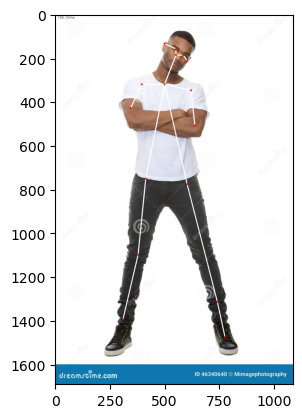

In [26]:
estimated_image = pose_estimation(img)
plt.imshow(cv.cvtColor(estimated_image, cv.COLOR_BGR2RGB))

In [5]:
cap = cv.VideoCapture(1)
cap.set(cv.CAP_PROP_FPS, 10)
cap.set(3, 800)
cap.set(4, 800)

if not cap.isOpened():
    cap = cv.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")
    
while cv.waitKey(1) < 0:
    hasFrame, frame = cap.read()
    if not hasFrame:
        cv.waitKey()
        break
        
    frameWidth = frame.shape[1]
    frameHeight = frame.shape[0]
    net.setInput(cv.dnn.blobFromImage(frame, 1.0, (inWidth, inHeight), (127.5, 127.5, 127.5), swapRB=True, crop=False))
    out = net.forward()
    out = out[:, :19, :, :]
    
    assert(len(BODY_PARTS) == out.shape[1])
    
    points = []
    
    for i in range(len(BODY_PARTS)):
        # Slice heatmap of corresponding body's part.
        heatMap = out[0, i, :, :]

        # Originally, we try to find all the local maximums. To simplify a sample
        # we just find a global one. However only a single pose at the same time
        # could be detected this way.
        _, conf, _, point = cv.minMaxLoc(heatMap)
        x = (frameWidth * point[0]) / out.shape[3]
        y = (frameHeight * point[1]) / out.shape[2]

        # Add a point if it's confidence is higher than threshold.
        points.append((int(x), int(y)) if conf > thr else None)

    for pair in POSE_PAIRS:
        partFrom = pair[0]
        partTo = pair[1]
        assert(partFrom in BODY_PARTS)
        assert(partTo in BODY_PARTS)

        idFrom = BODY_PARTS[partFrom]
        idTo = BODY_PARTS[partTo]

        if points[idFrom] and points[idTo]:
            cv.line(frame, points[idFrom], points[idTo], (0, 255, 0), 3)
            cv.ellipse(frame, points[idFrom], (3, 3), 0, 0, 360, (0, 0, 255), cv.FILLED)
            cv.ellipse(frame, points[idTo], (3, 3), 0, 0, 360, (0, 0, 255), cv.FILLED)
        
    t, _ = net.getPerfProfile()
    freq = cv.getTickFrequency() / 1000
    cv.putText(frame, '%.2fms' % (t / freq), (10, 20), cv.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0))

    cv.imshow('Pose estimation trial', frame)

In [6]:
img=cv.imread("manpose.jpg")

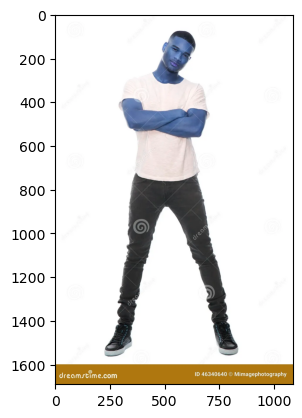

In [7]:
plt.imshow(img)

In [40]:
def pose_estimation(frame):
    frameWidth = frame.shape[1]
    frameHeight = frame.shape[0]
    net.setInput(cv.dnn.blobFromImage(frame, 1.0, (inWidth, inHeight), (127.5, 127.5, 127.5), swapRB=True, crop=False))
    out = net.forward()
    out = out[:, :19, :, :]
    
    assert(len(BODY_PARTS) == out.shape[1])
    
    points = []
    
    for i in range(len(BODY_PARTS)):
        # Slice heatmap of corresponding body's part.
        heatMap = out[0, i, :, :]

        # Find the global maximum (single pose detection assumption)
        _, conf, _, point = cv.minMaxLoc(heatMap)
        x = (frameWidth * point[0]) / out.shape[3]
        y = (frameHeight * point[1]) / out.shape[2]

        # Add a point if its confidence is higher than threshold.
        points.append((int(x), int(y)) if conf > thr else None)

    # Draw connections for POSE_PAIRS
    for pair in POSE_PAIRS:
        partFrom = pair[0]
        partTo = pair[1]
        assert(partFrom in BODY_PARTS)
        assert(partTo in BODY_PARTS)

        idFrom = BODY_PARTS[partFrom]
        idTo = BODY_PARTS[partTo]

        if points[idFrom] and points[idTo]:
            cv.line(frame, points[idFrom], points[idTo], (255, 255, 255), 4)
            cv.ellipse(frame, points[idFrom], (4, 4), 0, 0, 360, (0, 0, 255), cv.FILLED)
            cv.ellipse(frame, points[idTo], (4, 4), 0, 0, 360, (0, 0, 255), cv.FILLED)

    # Draw additional connections
    nose_id = BODY_PARTS["Nose"]
    left_hip_id = BODY_PARTS["LHip"]
    right_hip_id = BODY_PARTS["RHip"]

    if points[nose_id] and points[left_hip_id] and points[right_hip_id]:
        nose_point = points[nose_id]
        left_hip_point = points[left_hip_id]
        right_hip_point = points[right_hip_id]

        # Calculate the midpoint between left hip and right hip
        midpoint_x = (left_hip_point[0] + right_hip_point[0]) // 2
        midpoint_y = (left_hip_point[1] + right_hip_point[1]) // 2
        midpoint = (midpoint_x, midpoint_y)

        # Draw line and points for nose to midpoint
        cv.line(frame, nose_point, midpoint, (0 ,255, 0), 4)
        cv.ellipse(frame, nose_point, (4, 4), 0, 0, 360, (0, 0, 255), cv.FILLED)
        cv.ellipse(frame, midpoint, (4, 4), 0, 0, 360, (0, 0, 255), cv.FILLED)
        
    t, _ = net.getPerfProfile()
    freq = cv.getTickFrequency() / 1000
    cv.putText(frame, '%.2fms' % (t / freq), (10, 20), cv.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0))

    return frame


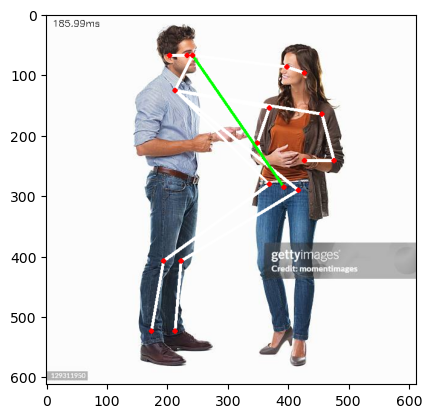

In [41]:
estimated_image = pose_estimation(img)
plt.imshow(cv.cvtColor(estimated_image, cv.COLOR_BGR2RGB))

In [41]:
img=cv.imread("manpose5.jpg")

In [25]:
import cv2
import numpy as np

# Assuming BODY_PARTS and POSE_PAIRS are already defined
# Adjust as per your existing setup

def pose_estimation(frame):
    frameWidth = frame.shape[1]
    frameHeight = frame.shape[0]
    net.setInput(cv2.dnn.blobFromImage(frame, 1.0, (inWidth, inHeight), (127.5, 127.5, 127.5), swapRB=True, crop=False))
    out = net.forward()
    out = out[:, :19, :, :]
    
    assert(len(BODY_PARTS) == out.shape[1])
    
    points = []
    
    for i in range(len(BODY_PARTS)):
        # Slice heatmap of corresponding body's part.
        heatMap = out[0, i, :, :]

        # Find the global maximum (single pose detection assumption)
        _, conf, _, point = cv2.minMaxLoc(heatMap)
        x = (frameWidth * point[0]) / out.shape[3]
        y = (frameHeight * point[1]) / out.shape[2]

        # Add a point if its confidence is higher than threshold.
        points.append((int(x), int(y)) if conf > thr else None)

    # Draw connections for POSE_PAIRS
    for pair in POSE_PAIRS:
        partFrom = pair[0]
        partTo = pair[1]
        assert(partFrom in BODY_PARTS)
        assert(partTo in BODY_PARTS)

        idFrom = BODY_PARTS[partFrom]
        idTo = BODY_PARTS[partTo]

        if points[idFrom] and points[idTo]:
            cv2.line(frame, points[idFrom], points[idTo], (255, 255, 255), 4)
            cv2.ellipse(frame, points[idFrom], (4, 4), 0, 0, 360, (0, 0, 255), cv2.FILLED)
            cv2.ellipse(frame, points[idTo], (4, 4), 0, 0, 360, (0, 0, 255), cv2.FILLED)

    # Draw additional connections and calculate angle for fall detection
    nose_id = BODY_PARTS["Nose"]
    left_hip_id = BODY_PARTS["LHip"]
    right_hip_id = BODY_PARTS["RHip"]

    if points[nose_id] and points[left_hip_id] and points[right_hip_id]:
        nose_point = points[nose_id]
        left_hip_point = points[left_hip_id]
        right_hip_point = points[right_hip_id]

        # Calculate the midpoint between left hip and right hip
        midpoint_x = (left_hip_point[0] + right_hip_point[0]) // 2
        midpoint_y = (left_hip_point[1] + right_hip_point[1]) // 2
        midpoint = (midpoint_x, midpoint_y)

        # Calculate vectors for angle calculation
        vector_head_midpoint = np.array(midpoint) - np.array(nose_point)
        vector_hip_left = np.array(left_hip_point) - np.array(midpoint)
        vector_hip_right = np.array(right_hip_point) - np.array(midpoint)

        # Calculate angles
        angle1 = np.degrees(np.arccos(np.dot(vector_head_midpoint, vector_hip_left) / (np.linalg.norm(vector_head_midpoint) * np.linalg.norm(vector_hip_left))))
        angle2 = np.degrees(np.arccos(np.dot(vector_head_midpoint, vector_hip_right) / (np.linalg.norm(vector_head_midpoint) * np.linalg.norm(vector_hip_right))))
        
        # Determine if fall or standing based on angle threshold (10 degrees)
        if min(angle1, angle2) < 10:
            cv2.putText(frame, "Fall Detected", (20, 50), cv2.FONT_HERSHEY_COMPLEX, 2.5, (0, 0, 255), 2, 11)
            print("Fall detected.")  # Add additional logging or alerting mechanisms here
        else:
            cv2.putText(frame, "Standing", (20, 50), cv2.FONT_HERSHEY_COMPLEX, 2.5, (0, 255, 0), 2, 11)
            print("Standing.")

    # Additional visualization and performance information
    t, _ = net.getPerfProfile()
    freq = cv2.getTickFrequency() / 1000
    cv2.putText(frame, '%.2fms' % (t / freq), (10, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0))

    return frame


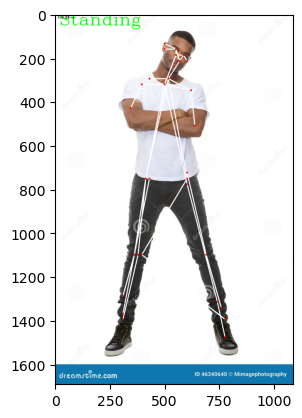

In [26]:
estimated_image = pose_estimation(img)
plt.imshow(cv.cvtColor(estimated_image, cv.COLOR_BGR2RGB))

In [23]:
import cv2
import numpy as np

# Assuming BODY_PARTS and POSE_PAIRS are already defined
# Adjust as per your existing setup

def pose_estimation(frame):
    frameWidth = frame.shape[1]
    frameHeight = frame.shape[0]
    net.setInput(cv2.dnn.blobFromImage(frame, 1.0, (inWidth, inHeight), (127.5, 127.5, 127.5), swapRB=True, crop=False))
    out = net.forward()
    out = out[:, :19, :, :]
    
    assert(len(BODY_PARTS) == out.shape[1])
    
    points = []
    
    for i in range(len(BODY_PARTS)):
        # Slice heatmap of corresponding body's part.
        heatMap = out[0, i, :, :]

        # Find the global maximum (single pose detection assumption)
        _, conf, _, point = cv2.minMaxLoc(heatMap)
        x = (frameWidth * point[0]) / out.shape[3]
        y = (frameHeight * point[1]) / out.shape[2]

        # Add a point if its confidence is higher than threshold.
        points.append((int(x), int(y)) if conf > thr else None)

    # Draw connections for POSE_PAIRS
    for pair in POSE_PAIRS:
        partFrom = pair[0]
        partTo = pair[1]
        assert(partFrom in BODY_PARTS)
        assert(partTo in BODY_PARTS)

        idFrom = BODY_PARTS[partFrom]
        idTo = BODY_PARTS[partTo]

        if points[idFrom] and points[idTo]:
            cv2.line(frame, points[idFrom], points[idTo], (255, 255, 255), 4)
            cv2.ellipse(frame, points[idFrom], (4, 4), 0, 0, 360, (0, 0, 255), cv2.FILLED)
            cv2.ellipse(frame, points[idTo], (4, 4), 0, 0, 360, (0, 0, 255), cv2.FILLED)

    # Enhance visualization for sleeping detection
    nose_id = BODY_PARTS["Nose"]
    left_hip_id = BODY_PARTS["LHip"]
    right_hip_id = BODY_PARTS["RHip"]

    if points[nose_id] and points[left_hip_id] and points[right_hip_id]:
        nose_point = points[nose_id]
        left_hip_point = points[left_hip_id]
        right_hip_point = points[right_hip_id]

        # Calculate the midpoint between left hip and right hip
        midpoint_x = (left_hip_point[0] + right_hip_point[0]) // 2
        midpoint_y = (left_hip_point[1] + right_hip_point[1]) // 2
        midpoint = (midpoint_x, midpoint_y)

        # Calculate vectors for angle calculation
        vector_head_midpoint = np.array(midpoint) - np.array(nose_point)
        vector_hip_left = np.array(left_hip_point) - np.array(midpoint)
        vector_hip_right = np.array(right_hip_point) - np.array(midpoint)

        # Calculate angles
        angle1 = np.degrees(np.arccos(np.dot(vector_head_midpoint, vector_hip_left) / (np.linalg.norm(vector_head_midpoint) * np.linalg.norm(vector_hip_left))))
        angle2 = np.degrees(np.arccos(np.dot(vector_head_midpoint, vector_hip_right) / (np.linalg.norm(vector_head_midpoint) * np.linalg.norm(vector_hip_right))))
        
        # Determine if fall or standing based on angle threshold (10 degrees)
        if min(angle1, angle2) < 10:
            cv2.putText(frame, "Fall Detected", (20, 50), cv2.FONT_HERSHEY_COMPLEX, 2.5, (0, 0, 255), 2, 11)
            print("Fall detected.")  # Add additional logging or alerting mechanisms here
        else:
            cv2.putText(frame, "Standing", (20, 50), cv2.FONT_HERSHEY_COMPLEX, 2.5, (0, 255, 0), 2, 11)
            print("Standing.")

    # Additional visualization and performance information
    t, _ = net.getPerfProfile()
    freq = cv2.getTickFrequency() / 1000
    cv2.putText(frame, '%.2fms' % (t / freq), (10, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0))

    return frame


In [57]:
img=cv.imread("manpose4.jpg")

In [59]:
import cv2 as cv
import numpy as np

# Load the pre-trained model
net = cv.dnn.readNetFromTensorflow("graph_opt.pb")

# Define BODY_PARTS and POSE_PAIRS based on the model
BODY_PARTS = {"Nose": 0, "Neck": 1, "RShoulder": 2, "RElbow": 3, "RWrist": 4,
              "LShoulder": 5, "LElbow": 6, "LWrist": 7, "RHip": 8, "RKnee": 9,
              "RAnkle": 10, "LHip": 11, "LKnee": 12, "LAnkle": 13, "REye": 14,
              "LEye": 15, "REar": 16, "LEar": 17, "Background": 18}

POSE_PAIRS = [["Neck", "RShoulder"], ["Neck", "LShoulder"], ["RShoulder", "RElbow"],
              ["RElbow", "RWrist"], ["LShoulder", "LElbow"], ["LElbow", "LWrist"],
              ["Neck", "RHip"], ["RHip", "RKnee"], ["RKnee", "RAnkle"],
              ["Neck", "LHip"], ["LHip", "LKnee"], ["LKnee", "LAnkle"],
              ["Neck", "Nose"], ["Nose", "REye"], ["REye", "REar"],
              ["Nose", "LEye"], ["LEye", "LEar"]]

inWidth = 368
inHeight = 368
thr = 0.2

def pose_estimation(frame):
    frameWidth = frame.shape[1]
    frameHeight = frame.shape[0]

    # Detect faces in the frame
    face_cascade = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_frontalface_default.xml')
    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)

    for (fx, fy, fw, fh) in faces:
        face_img = frame[fy:fy+fh, fx:fx+fw]
        net.setInput(cv.dnn.blobFromImage(face_img, 1.0, (inWidth, inHeight), (127.5, 127.5, 127.5), swapRB=True, crop=False))
        out = net.forward()
        out = out[:, :19, :, :]

        points = []
        
        for i in range(len(BODY_PARTS)):
            heatMap = out[0, i, :, :]
            _, conf, _, point = cv.minMaxLoc(heatMap)
            x_point = fx + (fw * point[0]) / out.shape[3]
            y_point = fy + (fh * point[1]) / out.shape[2]

            points.append((int(x_point), int(y_point)) if conf > thr else None)

        for pair in POSE_PAIRS:
            partFrom = pair[0]
            partTo = pair[1]
            idFrom = BODY_PARTS[partFrom]
            idTo = BODY_PARTS[partTo]

            if points[idFrom] and points[idTo]:
                cv.line(frame, points[idFrom], points[idTo], (255, 255, 255), 4)
                cv.ellipse(frame, points[idFrom], (4, 4), 0, 0, 360, (0, 0, 255), cv.FILLED)
                cv.ellipse(frame, points[idTo], (4, 4), 0, 0, 360, (0, 0, 255), cv.FILLED)

        nose_id = BODY_PARTS["Nose"]
        left_hip_id = BODY_PARTS["LHip"]
        right_hip_id = BODY_PARTS["RHip"]

        if points[nose_id] and points[left_hip_id] and points[right_hip_id]:
            nose_point = points[nose_id]
            left_hip_point = points[left_hip_id]
            right_hip_point = points[right_hip_id]

            midpoint_x = (left_hip_point[0] + right_hip_point[0]) // 2
            midpoint_y = (left_hip_point[1] + right_hip_point[1]) // 2
            midpoint = (midpoint_x, midpoint_y)

            cv.line(frame, nose_point, midpoint, (0, 255, 0), 4)
            cv.ellipse(frame, nose_point, (4, 4), 0, 0, 360, (0, 0, 255), cv.FILLED)
            cv.ellipse(frame, midpoint, (4, 4), 0, 0, 360, (0, 0, 255), cv.FILLED)

    # Performance measurement
    t, _ = net.getPerfProfile()
    freq = cv.getTickFrequency() / 1000
    cv.putText(frame, '%.2fms' % (t / freq), (10, 20), cv.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0))

    return frame

# Example usage
cap = cv.VideoCapture(0)  # Use 0 for the webcam, or provide the path to a video file

while cv.waitKey(1) < 0:
    hasFrame, frame = cap.read()
    if not hasFrame:
        cv.waitKey()
        break

    frame = pose_estimation(frame)
    cv.imshow('OpenPose Fall Detection', frame)


error: vector<T> too long

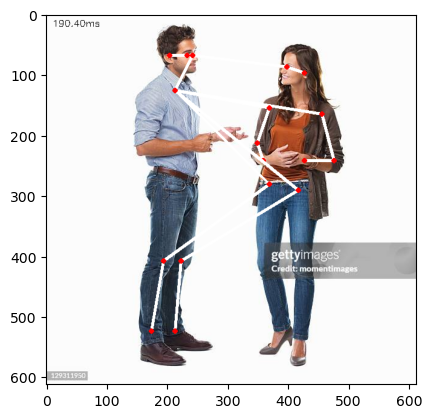

In [51]:
estimated_image = pose_estimation(img)
plt.imshow(cv.cvtColor(estimated_image, cv.COLOR_BGR2RGB))

In [92]:
import cv2
import numpy as np

# Assuming BODY_PARTS and POSE_PAIRS are already defined
# Adjust as per your existing setup

def pose_estimation(frame):
    frameWidth = frame.shape[1]
    frameHeight = frame.shape[0]
    net.setInput(cv2.dnn.blobFromImage(frame, 1.0, (inWidth, inHeight), (127.5, 127.5, 127.5), swapRB=True, crop=False))
    out = net.forward()
    out = out[:, :19, :, :]
    
    assert(len(BODY_PARTS) == out.shape[1])
    
    points = []
    
    for i in range(len(BODY_PARTS)):
        # Slice heatmap of corresponding body's part.
        heatMap = out[0, i, :, :]

        # Find the global maximum (single pose detection assumption)
        _, conf, _, point = cv2.minMaxLoc(heatMap)
        x = (frameWidth * point[0]) / out.shape[3]
        y = (frameHeight * point[1]) / out.shape[2]

        # Add a point if its confidence is higher than threshold.
        points.append((int(x), int(y)) if conf > thr else None)

    # Draw connections for POSE_PAIRS
    for pair in POSE_PAIRS:
        partFrom = pair[0]
        partTo = pair[1]
        assert(partFrom in BODY_PARTS)
        assert(partTo in BODY_PARTS)

        idFrom = BODY_PARTS[partFrom]
        idTo = BODY_PARTS[partTo]

        if points[idFrom] and points[idTo]:
            cv2.line(frame, points[idFrom], points[idTo], (255, 255, 255), 4)
            cv2.ellipse(frame, points[idFrom], (4, 4), 0, 0, 360, (0, 0, 255), cv2.FILLED)
            cv2.ellipse(frame, points[idTo], (4, 4), 0, 0, 360, (0, 0, 255), cv2.FILLED)

    # Enhance sleeping and fall detection
    nose_id = BODY_PARTS["Nose"]
    left_hip_id = BODY_PARTS["LHip"]
    right_hip_id = BODY_PARTS["RHip"]

    if points[nose_id] and points[left_hip_id] and points[right_hip_id]:
        nose_point = points[nose_id]
        left_hip_point = points[left_hip_id]
        right_hip_point = points[right_hip_id]

        # Calculate the midpoint between left hip and right hip
        midpoint_x = (left_hip_point[0] + right_hip_point[0]) // 2
        midpoint_y = (left_hip_point[1] + right_hip_point[1]) // 2
        midpoint = (midpoint_x, midpoint_y)

        # Calculate vectors for angle calculation
        vector_head_midpoint = np.array(midpoint) - np.array(nose_point)
        vector_hip_left = np.array(left_hip_point) - np.array(midpoint)
        vector_hip_right = np.array(right_hip_point) - np.array(midpoint)

        # Calculate angles
        angle1 = np.degrees(np.arccos(np.dot(vector_head_midpoint, vector_hip_left) / (np.linalg.norm(vector_head_midpoint) * np.linalg.norm(vector_hip_left))))
        angle2 = np.degrees(np.arccos(np.dot(vector_head_midpoint, vector_hip_right) / (np.linalg.norm(vector_head_midpoint) * np.linalg.norm(vector_hip_right))))
        
        # Determine if fall or standing based on adaptive angle threshold
        angle_threshold = 15  # Adjust this threshold based on your testing
        if min(angle1, angle2) < angle_threshold:
            cv2.putText(frame, "Fall Detected", (20, 50), cv2.FONT_HERSHEY_COMPLEX, 2.5, (0, 0, 255), 2, 11)
            print("Fall detected.")  # Add additional logging or alerting mechanisms here
        else:
            cv2.putText(frame, "Standing", (20, 50), cv2.FONT_HERSHEY_COMPLEX, 2.5, (0, 255, 0), 2, 11)
            print("Standing.")

    # Additional visualization and performance information
    t, _ = net.getPerfProfile()
    freq = cv2.getTickFrequency() / 1000
    cv2.putText(frame, '%.2fms' % (t / freq), (10, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0))

    return frame

In [50]:
def pose_estimation(frame):
    frameWidth = frame.shape[1]
    frameHeight = frame.shape[0]
    net.setInput(cv.dnn.blobFromImage(frame, 1.0, (inWidth, inHeight), (127.5, 127.5, 127.5), swapRB=True, crop=False))
    out = net.forward()
    out = out[:, :19, :, :]
    
    assert(len(BODY_PARTS) == out.shape[1])
    
    # Process each detected pose
    for person_id in range(out.shape[0]):
        points = []
        
        for i in range(len(BODY_PARTS)):
            # Slice heatmap of corresponding body's part.
            heatMap = out[person_id, i, :, :]

            # Find the global maximum (single pose detection assumption)
            _, conf, _, point = cv.minMaxLoc(heatMap)
            x = (frameWidth * point[0]) / out.shape[3]
            y = (frameHeight * point[1]) / out.shape[2]

            # Add a point if its confidence is higher than threshold.
            points.append((int(x), int(y)) if conf > thr else None)

        # Draw connections for POSE_PAIRS
        for pair in POSE_PAIRS:
            partFrom = pair[0]
            partTo = pair[1]
            assert(partFrom in BODY_PARTS)
            assert(partTo in BODY_PARTS)

            idFrom = BODY_PARTS[partFrom]
            idTo = BODY_PARTS[partTo]

            if points[idFrom] and points[idTo]:
                cv.line(frame, points[idFrom], points[idTo], (255,255,255), 4)
                cv.ellipse(frame, points[idFrom], (4, 4), 0, 0, 360, (0, 0, 255), cv.FILLED)
                cv.ellipse(frame, points[idTo], (4, 4), 0, 0, 360, (0, 0, 255), cv.FILLED)
        
        # Enhance sleeping and fall detection for each person
        # (Add your existing code for sleeping and fall detection here)
        
    t, _ = net.getPerfProfile()
    freq = cv.getTickFrequency() / 1000
    cv.putText(frame, '%.2fms' % (t / freq), (10, 20), cv.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0))

    return frame

In [ ]:
import cv2 as cv
import argparse
import os

BODY_PARTS = { "Nose": 0, "Neck": 1, "RShoulder": 2, "RElbow": 3, "RWrist": 4,
              "LShoulder": 5, "LElbow": 6, "LWrist": 7, "RHip": 8, "RKnee": 9,
              "RAnkle": 10, "LHip": 11, "LKnee": 12, "LAnkle": 13, "REye": 14,
              "LEye": 15, "REar": 16, "LEar": 17, "Background": 18 }

POSE_PAIRS = [ ["Neck", "RShoulder"], ["Neck", "LShoulder"], ["RShoulder", "RElbow"],
              ["RElbow", "RWrist"], ["LShoulder", "LElbow"], ["LElbow", "LWrist"],
              ["Neck", "RHip"], ["RHip", "RKnee"], ["RKnee", "RAnkle"], ["Neck", "LHip"],
              ["LHip", "LKnee"], ["LKnee", "LAnkle"], ["Neck", "Nose"], ["Nose", "REye"],
              ["REye", "REar"], ["Nose", "LEye"], ["LEye", "LEar"] ]

def pose_estimation(frame, net, input_size=(368, 368), threshold=0.2):
    frameWidth = frame.shape[1]
    frameHeight = frame.shape[0]
    
    net.setInput(cv.dnn.blobFromImage(frame, 1.0, input_size, (127.5, 127.5, 127.5), swapRB=True, crop=False))
    out = net.forward()
    out = out[:, :19, :, :]
    
    assert(len(BODY_PARTS) == out.shape[1])
    
    points = []
    
    for i in range(len(BODY_PARTS)):
        heatMap = out[0, i, :, :]
        _, conf, _, point = cv.minMaxLoc(heatMap)
        x = (frameWidth * point[0]) / out.shape[3]
        y = (frameHeight * point[1]) / out.shape[2]
        points.append((int(x), int(y)) if conf > threshold else None)

    for pair in POSE_PAIRS:
        partFrom = pair[0]
        partTo = pair[1]
        assert(partFrom in BODY_PARTS)
        assert(partTo in BODY_PARTS)

        idFrom = BODY_PARTS[partFrom]
        idTo = BODY_PARTS[partTo]

        if points[idFrom] and points[idTo]:
            cv.line(frame, points[idFrom], points[idTo], (0, 255, 0), 3)
            cv.ellipse(frame, points[idFrom], (3, 3), 0, 0, 360, (0, 0, 255), cv.FILLED)
            cv.ellipse(frame, points[idTo], (3, 3), 0, 0, 360, (0, 0, 255), cv.FILLED)
        
    t, _ = net.getPerfProfile()
    freq = cv.getTickFrequency() / 1000
    cv.putText(frame, '%.2fms' % (t / freq), (10, 20), cv.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0))

    return frame

def main():
    net = cv.dnn.readNetFromTensorflow("graph_opt.pb")
    print(f"Loaded model: graph_opt.pb")
    print(f"Input size: (368, 368)")

    cap = cv.VideoCapture(0)
    cap.set(cv.CAP_PROP_FPS, 10)
    cap.set(3, 800)
    cap.set(4, 800)

    if not cap.isOpened():
        raise IOError("Cannot open webcam")

    while True:
        hasFrame, frame = cap.read()
        if not hasFrame:
            break

        estimated_image = pose_estimation(frame, net, input_size=(368, 368), threshold=0.2)
        cv.imshow('Pose Estimation', estimated_image)

        if cv.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()
    cv.destroyAllWindows()

if __name__ == '__main__':
    main()


Loaded model: graph_opt.pb
Input size: (368, 368)


In [ ]:
import cv2 as cv

# Load the pre-trained model
net = cv.dnn.readNetFromTensorflow("graph_opt.pb")

# Define BODY_PARTS and POSE_PAIRS based on the model
BODY_PARTS = {"Nose": 0, "Neck": 1, "RShoulder": 2, "RElbow": 3, "RWrist": 4,
              "LShoulder": 5, "LElbow": 6, "LWrist": 7, "RHip": 8, "RKnee": 9,
              "RAnkle": 10, "LHip": 11, "LKnee": 12, "LAnkle": 13, "REye": 14,
              "LEye": 15, "REar": 16, "LEar": 17, "Background": 18}

POSE_PAIRS = [["Neck", "RShoulder"], ["Neck", "LShoulder"], ["RShoulder", "RElbow"],
              ["RElbow", "RWrist"], ["LShoulder", "LElbow"], ["LElbow", "LWrist"],
              ["Neck", "RHip"], ["RHip", "RKnee"], ["RKnee", "RAnkle"],
              ["Neck", "LHip"], ["LHip", "LKnee"], ["LKnee", "LAnkle"],
              ["Neck", "Nose"], ["Nose", "REye"], ["REye", "REar"],
              ["Nose", "LEye"], ["LEye", "LEar"]]

inWidth = 368
inHeight = 368
thr = 0.2

def pose_estimation(img):
    frameWidth = img.shape[1]
    frameHeight = img.shape[0]

    # Detect faces in the image
    face_cascade = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_frontalface_default.xml')
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)

    for (fx, fy, fw, fh) in faces:
        face_img = img[fy:fy+fh, fx:fx+fw]
        net.setInput(cv.dnn.blobFromImage(face_img, 1.0, (inWidth, inHeight), (127.5, 127.5, 127.5), swapRB=True, crop=False))
        out = net.forward()
        out = out[:, :19, :, :]

        points = []
        
        for i in range(len(BODY_PARTS)):
            heatMap = out[0, i, :, :]
            _, conf, _, point = cv.minMaxLoc(heatMap)
            x_point = fx + (fw * point[0]) / out.shape[3]
            y_point = fy + (fh * point[1]) / out.shape[2]

            points.append((int(x_point), int(y_point)) if conf > thr else None)

        for pair in POSE_PAIRS:
            partFrom = pair[0]
            partTo = pair[1]
            idFrom = BODY_PARTS[partFrom]
            idTo = BODY_PARTS[partTo]

            if points[idFrom] and points[idTo]:
                cv.line(img, points[idFrom], points[idTo], (255, 255, 255), 4)
                cv.ellipse(img, points[idFrom], (4, 4), 0, 0, 360, (0, 0, 255), cv.FILLED)
                cv.ellipse(img, points[idTo], (4, 4), 0, 0, 360, (0, 0, 255), cv.FILLED)

        nose_id = BODY_PARTS["Nose"]
        left_hip_id = BODY_PARTS["LHip"]
        right_hip_id = BODY_PARTS["RHip"]

        if points[nose_id] and points[left_hip_id] and points[right_hip_id]:
            nose_point = points[nose_id]
            left_hip_point = points[left_hip_id]
            right_hip_point = points[right_hip_id]

            midpoint_x = (left_hip_point[0] + right_hip_point[0]) // 2
            midpoint_y = (left_hip_point[1] + right_hip_point[1]) // 2
            midpoint = (midpoint_x, midpoint_y)

            cv.line(img, nose_point, midpoint, (0, 255, 0), 4)
            cv.ellipse(img, nose_point, (4, 4), 0, 0, 360, (0, 0, 255), cv.FILLED)
            cv.ellipse(img, midpoint, (4, 4), 0, 0, 360, (0, 0, 255), cv.FILLED)

    # Performance measurement
    net.setInput(cv.dnn.blobFromImage(img, 1.0, (inWidth, inHeight), (127.5, 127.5, 127.5), swapRB=True, crop=False))
    out = net.forward()
    out = out[:, :19, :, :]
    t, _ = net.getPerfProfile()
    freq = cv.getTickFrequency() / 1000
    cv.putText(img, '%.2fms' % (t / freq), (10, 20), cv.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0))

    return img



if img is None:
    print(f"Error loading image: {img_path}")
else:
    estimated_image = pose_estimation(img)
    cv.imshow('OpenPose Fall Detection', estimated_image)
    cv.waitKey(0)
    cv.destroyAllWindows()
